## Пользователи мобильного приложения

    Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно? После этого исследуйте результаты A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/B-теста. Для него пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше. В случае общей аналитики и A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам. 
    
    В работе будут следущие шаги:

###  1 Загрузка данных для анализа
 
###  2  Подготовка данных для анализа
    
    • Замените названия столбцов на удобные для вас; 
    • Проверьте пропуски и типы данных. Откорректируйте, если нужно; 
    • Добавьте столбец даты и времени, а также отдельный столбец дат

###  3 Изучение и проверка данных
    
    • Сколько всего событий в логе? 
    • Сколько всего пользователей в логе? 
    • Сколько в среднем событий приходится на пользователя? 
    • Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле? 
    • Много ли событий и пользователей вы потеряли, отбросив старые данные? 
    • Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.
    
###  4 Анализ воронки событий
    
    • Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте. 
    • Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие. 
    • Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки. 
    • По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C, посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A. 
    • На каком шаге теряете больше всего пользователей? 
    • Какая доля пользователей доходит от первого события до оплаты? 
    
###  5 Проведение эксперимента 
    
    • Сколько пользователей в каждой экспериментальной группе? 
    • Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247. 
    • Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно? 
    • Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать? 
    • Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы. 

### Задание 1
<font color='#045a8d'> 
Импортируем нужные пакеты и читаем файл с данными. Смотрим на тип данных, и меняем для даты (event_date) и идектификатора события типы данных.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth
import seaborn as sns

data = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<font color='#045a8d'> Добавлю свои цвета для оформления

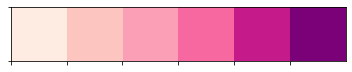

In [2]:
my_palette = ['#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#c51b8a', '#7a0177']
sns.palplot(sns.color_palette(my_palette))

### Задание 2
<font color='#045a8d'> 
Заменяем названия столбцов на удобные, пропусков в данных нет, меняем тип данных на нужный. Добавляем столбцы даты и времени.

<font color='#045a8d'> Проверка данных на дубликаты

In [3]:
data[data.duplicated(keep=False)].count()[0]

768

<font color='#045a8d'> В данных 768 дубликата - это 0.31% от всех данных. Поэтому любое действие с ними (сохранение или удаление) не приведет к искажению дальнейшего анализа. Так  как в задании явно не сказано, что с ними делать - удалять не буду.

In [4]:
# заменяем названия на удобные
data.columns = ['event_name', 'user_id', 'event_date', 'exp_id']

# заменим пропуски (их нет) и типы данных
data.event_date = pd.to_datetime(data.event_date, unit = 's')
data.exp_id = data.exp_id.astype('object') 

# добавляем столбцы даты и времени
data['date'] = data.event_date.dt.date
data['time'] = data.event_date.dt.time

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
event_name    244126 non-null object
user_id       244126 non-null int64
event_date    244126 non-null datetime64[ns]
exp_id        244126 non-null object
date          244126 non-null object
time          244126 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 11.2+ MB


<font color='#045a8d'> В итоге на вход подаются данные о поведении пользователей мобильного приложения (порядка 245 тыс. записей). Из них 768 записей - дубликаты, они точно не повлият на дальнеший анализ из-за своего количества. Для удобства столбцы датафрейма переименованы, а также заменены типы данных на нужные. Все готово для изучения и подготовки данных к провередению эксперимента.

### Задание 3
<font color='#045a8d'> 
Проверим, как распределены данные по дате событий.

In [5]:
import warnings
warnings.filterwarnings("ignore")

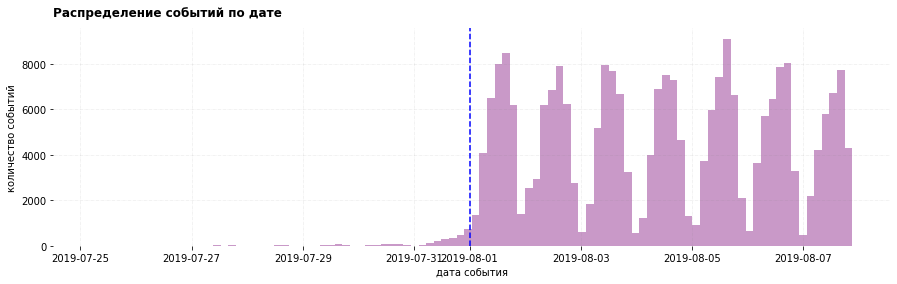

In [6]:
f, ax = plt.subplots(figsize=(15, 4))
sns.distplot(data.event_date, kde=False, bins=100, color = '#7a0177')
plt.title('Распределение событий по дате', loc='left', pad=12, fontweight="bold")
ax.set(ylabel="количество событий", xlabel="дата события")
for s in ['top','bottom','left','right']:                   
    ax.spines[s].set_visible(False)                          
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
plt.axvline(pd.to_datetime('2019-08-01'), ls='--', color='b')

<font color='#045a8d'> Делаем выводы по графику.

In [7]:
print('ПРОВЕРКА ДАННЫХ:')
print('Всего в логе', data.event_name.nunique(), 'событий и', data.user_id.nunique(),'пользователей')

event_per_user = data.groupby('event_date').agg({'user_id': ['count', 'nunique']})
event_per_user.columns = ['event', 'users']

print('В среднем на пользователя приходится ',round(event_per_user.event.sum() / event_per_user.users.sum(), 2),' событий')
print('Для анализа смотрим период с', data.date.min(), 'по', data.date.max())

data_new = data[(data['date'] >= pd.to_datetime("2019-8-1").date())]
print('Но из-за "перекашивания" данных, лучше взять период с', data_new.date.min(), 'по', data_new.date.max())

data_old = data[(data['date'] < pd.to_datetime("2019-8-1").date())]
print('Отбросив старые данные, потерялись', data.event_date.count() - data_new.event_date.count(), 'событий и', 
      data.user_id.nunique() - data_new.user_id.nunique(), 'пользователей')
print('При этом, для анализа есть пользователи из всех экспериментальных групп:', data_new.exp_id.unique())

ПРОВЕРКА ДАННЫХ:
Всего в логе 5 событий и 7551 пользователей
В среднем на пользователя приходится  1.11  событий
Для анализа смотрим период с 2019-07-25 по 2019-08-07
Но из-за "перекашивания" данных, лучше взять период с 2019-08-01 по 2019-08-07
Отбросив старые данные, потерялись 2828 событий и 17 пользователей
При этом, для анализа есть пользователи из всех экспериментальных групп: [246 247 248]


In [8]:
data_new.groupby('exp_id').agg({'event_date':'count', 'user_id':'nunique'}).reset_index().rename(columns=
                                                            {'event_date':'count_event', 'user_id':'count_user'})

,exp_id,count_event,count_user
0,246,79425,2484
1,247,77147,2513
2,248,84726,2537


<font color='#045a8d'> Распределение участников по группам равномерное, а вот количества событий - нет. В контрольной группе событий больше, чем в экспериментальных.

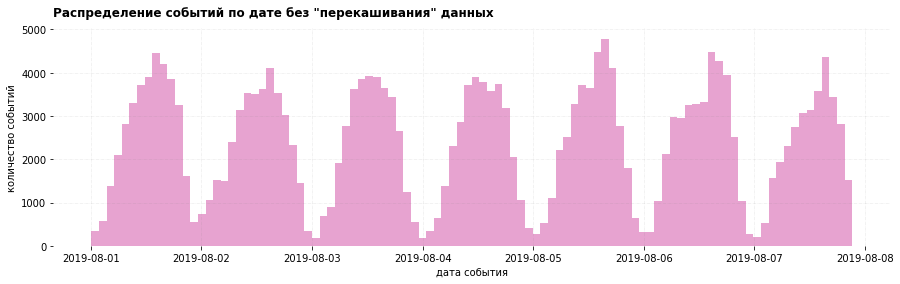

In [9]:
f, ax = plt.subplots(figsize=(15, 4))
sns.distplot(data_new.event_date, color = '#c51b8a', kde=False, bins=100)
plt.title('Распределение событий по дате без "перекашивания" данных', loc='left', pad=12, fontweight="bold")
ax.set(ylabel="количество событий", xlabel="дата события")
for s in ['top','bottom','left','right']:                   
    ax.spines[s].set_visible(False)                          
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

<font color='#045a8d'> В данных есть "доезжающие" события. Вероятно из-за неисправности сети у пользователя некоторые события копятся в кэшэ и регистрируются только через какое-то время. Поэтому в ходе анализа данных мы отсекли часть, чтобы избавиться от "шумов". Несмотря на это, в данных есть все экспериментальные группы.

### Задание 4
<font color='#045a8d'> 
Посмотрим воронку событий

<font color='#045a8d'> Так как вопронка событий - это последовательные события, и у пользователя приложения нет возможности пропустить какой-то из шагов воронки, событие Tutorial вероятнее всего следует не включать. После оплаты товара (шаг PaymentScreenSuccessful) на страницу обучения пользователь вряд ли должен переходить.

In [10]:
def hist(x,y, data, title, color, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(x,y))        # размер графика
    ax.barh(data.iloc[:,0], data.iloc[:,1], color=color) # горизонтальный bar по данным + задаем цвет
    ax.set_title(title, loc='left', pad=12, fontweight="bold")   # заголовок графика + задаем шрифт
    for s in ['top','bottom','left','right']:                    # убираю все границы графика
        ax.spines[s].set_visible(False)                          
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)  # задаю только промежуточные границы по значениям
    for i in ax.patches:                                                     # цикл по значениям
        ax.text(i.get_width()+2, i.get_y()+0.5, str(round((i.get_width()), 2)),   # задаю отступ (+) для подписи
                fontsize=10, fontweight='bold', color='black')                     # задаю шрифт и цвет подписи значения
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show() 

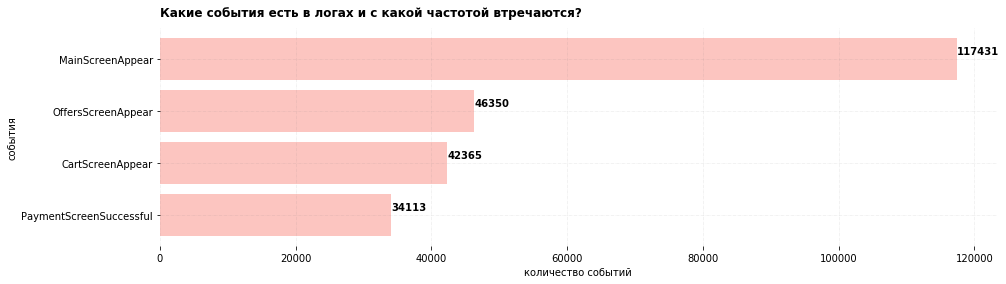

In [11]:
events_per_type = (data_new.query('event_name != "Tutorial"').groupby('event_name')['date']
                   .count()
                   .reset_index()
                   .sort_values(by='date', ascending = False)
                   .rename({'event_name': 'event', 'date': 'count_of_events'}, axis=1))
# print('Какие события есть в логах и с какой частотой втречаются:\n', events_per_type)

hist(15, 4, events_per_type.sort_values('count_of_events', ascending=True),
     'Какие события есть в логах и с какой частотой втречаются?', '#fcc5c0', 'количество событий', 'события')

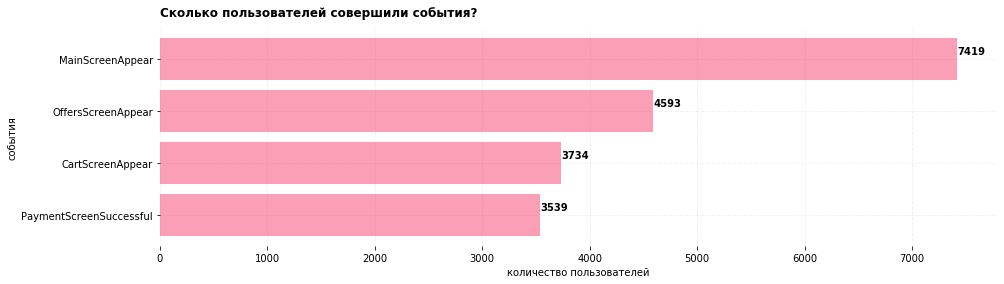

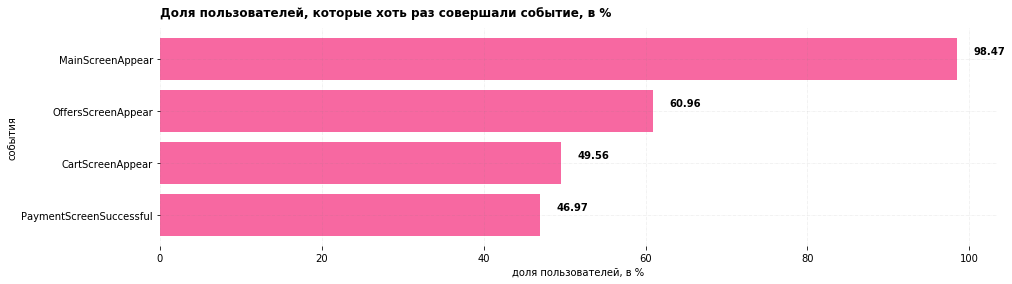

In [12]:
events_per_user = (data_new.query('event_name != "Tutorial"').groupby('event_name')
                   .agg({'user_id': 'nunique'})
                   .reset_index().sort_values(by='user_id', ascending = False)
                   .rename({'event_name': 'event', 'user_id': 'count_of_users'}, axis=1))

# ratio_% - доля пользователей, которые хоть раз совершали событие
events_per_user['ratio_%'] = round(events_per_user.count_of_users / data_new.user_id.nunique() * 100,2)

hist(15, 4, events_per_user.sort_values('count_of_users', ascending=True),'Сколько пользователей совершили события?', 
     '#fa9fb5', 'количество пользователей', 'события')

hist(15, 4, events_per_user[['event', 'ratio_%']].sort_values('ratio_%', ascending=True),
     'Доля пользователей, которые хоть раз совершали событие, в %', '#f768a1', 'доля пользователей, в %', 'события')

47.7 % пользователей доходит от первого события до оплаты.


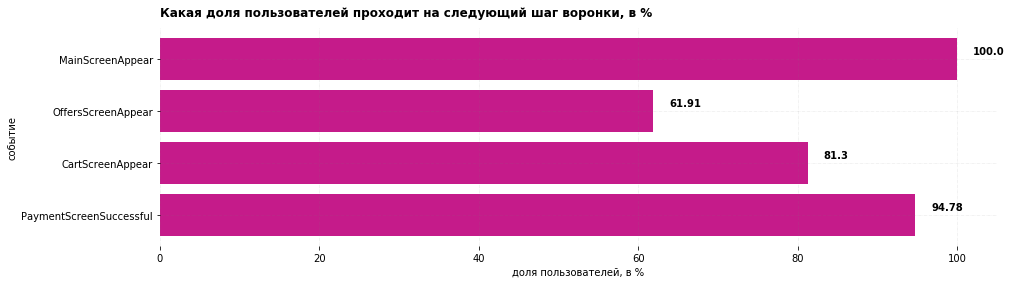

posx and posy should be finite values
posx and posy should be finite values


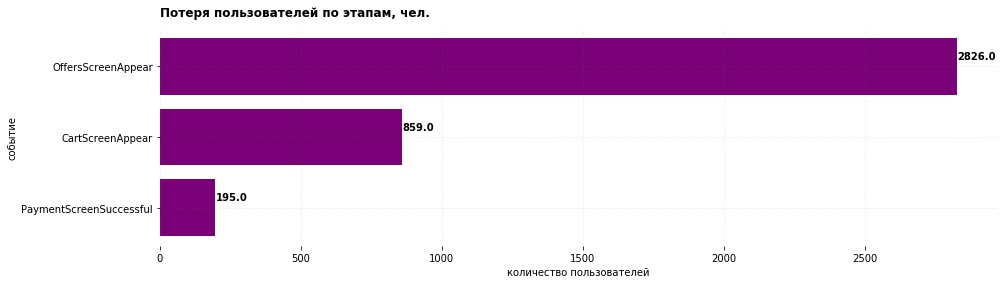

In [13]:
events_per_user['unique_prev_step'] = events_per_user['count_of_users'].shift(1)

events_per_user.loc[events_per_user['unique_prev_step'].isna(),'unique_prev_step'] = \
              events_per_user.loc[events_per_user['unique_prev_step'].isna(),'count_of_users']

events_per_user['prev_step_%'] = round(events_per_user.count_of_users / events_per_user.unique_prev_step *100, 2)
events_per_user['delta'] = (events_per_user.count_of_users.shift(1) - events_per_user.count_of_users)

print(round(events_per_user.loc[3, 'count_of_users']/events_per_user.loc[1, 'count_of_users'] * 100,2), 
      '% пользователей доходит от первого события до оплаты.')

hist(15, 4, events_per_user[['event', 'prev_step_%','count_of_users']].sort_values('count_of_users', ascending=True),
     'Какая доля пользователей проходит на следующий шаг воронки, в %', '#c51b8a', 'доля пользователей, в %', 'событие')

hist(15, 4, events_per_user[['event', 'delta','count_of_users']].sort_values('count_of_users', ascending=True),
     'Потеря пользователей по этапам, чел.', '#7a0177', 'количество пользователей', 'событие')

In [14]:
events_per_user[['event', 'count_of_users', 'unique_prev_step','prev_step_%']]

,event,count_of_users,unique_prev_step,prev_step_%
1,MainScreenAppear,7419,7419.0,100.00
2,OffersScreenAppear,4593,7419.0,61.91
0,CartScreenAppear,3734,4593.0,81.30
3,PaymentScreenSuccessful,3539,3734.0,94.78


<font color='#045a8d'> На первом графике (какая доля пользователей...) выведен показатель prev_step_%. Для того, чтобы его расчитать, вывела показатель unique_prev_step через sheft (то есть сделала сдвиг на одну строку) - это число пользователей с предыдущего шага. Далее берем отношение шага к предыдущему.

<font color='#045a8d'> Например, на втором шаге (OffersScreenAppear) пользователей 7419, а на следующий перешли только 4593, значит это примерно 62% от предыдущего шага.
    
<font color='#045a8d'> То есть расчет по логике, который ты описал. Подскажи, пожалуйста, что не так?

<font color='#045a8d'> Да, событие Tutorial исключено из воронки (обосновано выше), порядок сортировки на четвертом графике поменяла.

<font color='#045a8d'> Из графиков видно, что до покупки в приложении доходят только около половины всех пользователей. На этапе перехода на страницу каталога продуктов теряется больше всего пользователей. Возможно, это связано с тем, что не совсем понятно, как перейти в каталог из главной страницы. Кроме того, только половина участников совершают покупку товаров. Есть вероятность технических проблем с электронными платежами. При этом данные карты заводят также заводят только половина участников - каталог товаров можно пересмотреть.

### Задание 5
<font color='#045a8d'> 
Проведем эксперимент. Для этого посмотрим, сколько пользователей в каждой экспериментальной группе, а также соотношение пользователей по событиям (так же в разрезе групп).

<font color='#045a8d'> Не нужен, забыла убрать)

In [15]:
# Сколько пользователей в каждой экспериментальной группе? 
exp_count_user = (data_new.pivot_table(index='exp_id', values='user_id', aggfunc=lambda x: x.nunique()))['user_id']
# для проведения тестирования для выборки 246+247 добавим новый столбец
exp_count_user['all'] = exp_count_user.iloc[1] + exp_count_user.iloc[0]

print('Сколько пользователей в каждой экспериментальной группе?\n', exp_count_user)
print()
print('Количество пользователей контрольных групп отличаются друг от друга на', 
     round((exp_count_user.iloc[1]/exp_count_user.iloc[0] - 1)*100,2), '%')

Сколько пользователей в каждой экспериментальной группе?
 exp_id
246    2484
247    2513
248    2537
all    4997
Name: user_id, dtype: int64

Количество пользователей контрольных групп отличаются друг от друга на 1.17 %


<font color='#045a8d'>  Для контрольных групп фиксируют и отправляют в системы аналитики данные об одном и том же. Можем провести тест А\А для контрольных групп

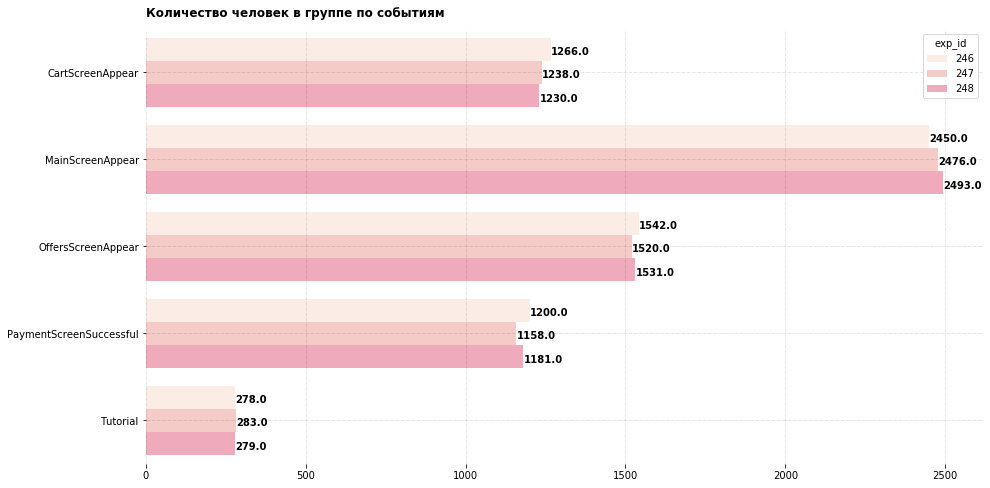

In [16]:
exp_per_user = data_new.pivot_table(columns='event_name', 
                                    index = 'exp_id', 
                                    values = 'user_id', 
                                    aggfunc ='nunique').reset_index()

fig, ax = plt.subplots(figsize=(15,8))



ax.set_title('Количество человек в группе по событиям', loc='left', pad=12, fontweight="bold")

for s in ['top','bottom','left','right']: 
    ax.spines[s].set_visible(False)
ax.grid(b=True, color='black', linestyle='-.', linewidth=0.5, alpha=0.2)

for i in ax.patches:                                                    
    ax.text(i.get_width()+1, i.get_y()+0.2, str(round((i.get_width()), 0)),   
                fontsize=10, fontweight='bold', color='black')
    
ax.set(ylabel="", xlabel="")
plt.show()

<font color='#045a8d'> По графику видно, что самое популярное событие - Переход на главную страницу (MainScreenAppear),
    число пользователей по каждой группе также наглядно представлено на графике.

In [17]:
# тот же датасет что и для графика выше, просто "перевернула" его для дальнейшего анализа
users_events_per_group = data_new.pivot_table(index='event_name', 
                                              values='user_id', 
                                              columns='exp_id', aggfunc=lambda x: x.nunique())
users_events_per_group = users_events_per_group.assign(all = [2504, 4926, 3062, 2358, 561])
# users_events_per_group['bla'] = users_events_per_group.loc['event_name', '247'] + users_events_per_group.iloc[:,[0]]
# users_events_per_group.loc['event_name', '247']

<font color='#045a8d'> Для докозательства о равенстве долей групп проведем z-тест для каждого события в данных. Для удобства напишем функцию.

In [18]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.01):
    # пропорция успехов в первой и второй группах:
    p1 = successes1/trials1
    p2 = successes2/trials2

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # разница пропорций в датасетах
    difference = p1 - p2
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print(f'p-значение: {p_value:.1%}')

    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')  

In [19]:
def check_hypithesis(users_events_per_group, exp_count_user, event, exp1, exp2):
    
    pr1 = users_events_per_group.loc[event, exp1] / exp_count_user.loc[exp1]
    pr2 = users_events_per_group.loc[event, exp2] / exp_count_user.loc[exp2]
    print(f'{pr1:.0%} пользователей с событием {event} в группе {exp1}')
    print(f'{pr2:.0%} пользователей с событием {event} в группе {exp2}')
    
    z_test(users_events_per_group.loc[event, exp1],
           users_events_per_group.loc[event, exp2],
           exp_count_user.loc[exp1],
           exp_count_user.loc[exp2])

<font color='#045a8d'> Находят ли статистические критерии разницу между выборками 246 и 247?

<font color='#045a8d'> Гипитеза H0 - между экспериментальными группами 246 и 247 нет разницы в долях по каждому из событий воронки.

In [20]:
print('A\A тестирование:\n')
for event in users_events_per_group.index:
    check_hypithesis(users_events_per_group, exp_count_user,
                          event, 246, 247)
    print()

A\A тестирование:

51% пользователей с событием CartScreenAppear в группе 246
49% пользователей с событием CartScreenAppear в группе 247
p-значение: 22.9%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

99% пользователей с событием MainScreenAppear в группе 246
99% пользователей с событием MainScreenAppear в группе 247
p-значение: 75.7%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

62% пользователей с событием OffersScreenAppear в группе 246
60% пользователей с событием OffersScreenAppear в группе 247
p-значение: 24.8%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

48% пользователей с событием PaymentScreenSuccessful в группе 246
46% пользователей с событием PaymentScreenSuccessful в группе 247
p-значение: 11.5%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

11% пользователей с событием Tutorial в группе 246
11% пользователей с событием Tutorial в группе 247
p

<font color='#045a8d'>  Такая разница в пропорциях при указанных размерах выборок не достаточна, чтобы говорить о статистически значимом различии. Следовательно, тест А\А пройден.

<font color='#045a8d'> Проверим для каждого события, является ли разница между контрольной группой и экспериментальной статистически достоверной.

<font color='#045a8d'> Гипотеза H0 для A\B тестирования следующая: при изменении шрифта в приложении, не будет "оттока" пользователей. Новый шрифт не заставит юзера перестать совершать покупки в приложении.

<font color='#045a8d'> Проверим первую экспериментальную группу с контрольной.

In [21]:
print('A\B тестирование для 246 и 248:\n')
for event in users_events_per_group.index:
    check_hypithesis(users_events_per_group, exp_count_user,
                          event, 246, 248)
    print() 

A\B тестирование для 246 и 248:

51% пользователей с событием CartScreenAppear в группе 246
48% пользователей с событием CartScreenAppear в группе 248
p-значение: 7.8%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

99% пользователей с событием MainScreenAppear в группе 246
98% пользователей с событием MainScreenAppear в группе 248
p-значение: 29.5%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

62% пользователей с событием OffersScreenAppear в группе 246
60% пользователей с событием OffersScreenAppear в группе 248
p-значение: 20.8%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

48% пользователей с событием PaymentScreenSuccessful в группе 246
47% пользователей с событием PaymentScreenSuccessful в группе 248
p-значение: 21.2%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

11% пользователей с событием Tutorial в группе 246
11% пользователей с событием Tutorial в

<font color='#045a8d'> Проверим вторую экспериментальную группу с контрольной.

In [22]:
print('A\B тестирование для 247 и 248:\n')
for event in users_events_per_group.index:
    check_hypithesis(users_events_per_group, exp_count_user,
                          event, 247, 248)
    print() 

A\B тестирование для 247 и 248:

49% пользователей с событием CartScreenAppear в группе 247
48% пользователей с событием CartScreenAppear в группе 248
p-значение: 57.9%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

99% пользователей с событием MainScreenAppear в группе 247
98% пользователей с событием MainScreenAppear в группе 248
p-значение: 45.9%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

60% пользователей с событием OffersScreenAppear в группе 247
60% пользователей с событием OffersScreenAppear в группе 248
p-значение: 92.0%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

46% пользователей с событием PaymentScreenSuccessful в группе 247
47% пользователей с событием PaymentScreenSuccessful в группе 248
p-значение: 73.7%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

11% пользователей с событием Tutorial в группе 247
11% пользователей с событием Tutorial 

<font color='#045a8d'> Проверим две экспериментальные группы (all) с контрольной.

In [23]:
print('A\B тестирование для 246+247 и 248:\n')
for event in users_events_per_group.index:
    check_hypithesis(users_events_per_group, exp_count_user,
                          event, 'all', 248)
    print() 

A\B тестирование для 246+247 и 248:

50% пользователей с событием CartScreenAppear в группе all
48% пользователей с событием CartScreenAppear в группе 248
p-значение: 18.2%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

99% пользователей с событием MainScreenAppear в группе all
98% пользователей с событием MainScreenAppear в группе 248
p-значение: 29.4%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

61% пользователей с событием OffersScreenAppear в группе all
60% пользователей с событием OffersScreenAppear в группе 248
p-значение: 43.4%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

47% пользователей с событием PaymentScreenSuccessful в группе all
47% пользователей с событием PaymentScreenSuccessful в группе 248
p-значение: 60.0%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

11% пользователей с событием Tutorial в группе all
11% пользователей с событием Tutor

<font color='#045a8d'> По результатам проведения A\B тестирования каждого события в логах, можно сказать о равенстве долей. Это значит, что Н0 потдвердилась, - шрифт не отпугивает пользователей приложения.

## Итоги:

- Самое частое событие в воронке - переход на главную страницу приложения. Далее идет переход в каталог товаров, заполнение данных по банковсокой карте, совершение платежа, и, наконец, - страница с объяснением, как совершить покупку.
- Последнее действие логически не на том месте в порядке совершения покупки в приложении пользователем. Было бы разумнее, сначала узнать все о покупках, а потом переходить к следующим действиям.
- Из графиков видно, что до покупки в приложении совершают только около половины всех пользователей. На этапе перехода на страницу каталога продуктов теряется больше всего пользователей. Возможно, это связано с тем, что не совсем понятно, как перейти в каталог из главной страницы. Кроме того, только половина участников совершают покупку товаров. Есть вероятность технических проблем с электронными платежами. При этом данные карты заводят также заводят только половина участников - каталог товаров можно пересмотреть.
- В контрольных группах данные говорят об одном и том же. Количество пользователей этих групп почти не отличаются друг от друга, поэтому можно проводить подготовку к a\b тесту.
- По результатам проведения тестам на статистическую достоверность, можно отметить, что между долями всех групп в приложении нет значимой разницы. Можно смело менять шрифт в приложении, страхи менеджеров не оправдались.